In [2]:
import pandas as pd
from sodapy import Socrata

In [3]:
# This works

import requests

## Exploring Data Based on Different Parameters

### 1) Variants of Buses Running in Winnipeg
We have to manually define bus variants (ranging from 1-10) in the api url to get each bus variant name

In [4]:
# Generating data based on variant 1

response = requests.get("https://api.winnipegtransit.com/v3/variants:1.json?api-key=wPOIZFdePaV6BdttKD7C")
response.json()

{'variants': [{'key': '16-0-s', 'name': 'Selkirk-Osborne to St.Vital Center'},
  {'key': '1-0', 'name': '1 On-Request'},
  {'key': '11-1-M', 'name': 'Portage-Kildonan to City Hall'},
  {'key': '10-1-W',
   'name': 'St. Boniface-Wolseley to Wolseley via Provencher'},
  {'key': '10-0-SP',
   'name': 'St. Boniface-Wolseley to St. Boniface via Provencher'},
  {'key': '10-1-WT', 'name': 'St. Boniface-Wolseley to Wolseley via Tache'},
  {'key': '10-0-ST',
   'name': 'St. Boniface-Wolseley to St. Boniface via Tache'},
  {'key': '10-1-WP',
   'name': 'St. Boniface-Wolseley to Wolseley-Provencher via Provencher'},
  {'key': '10-1-#', 'name': 'St.Boniface-Wolseley to Downtown'},
  {'key': '11-1-D', 'name': 'Portage-Kildonan to North Kildonan via Donwood'},
  {'key': '11-0-P', 'name': 'Portage-Kildonan to Polo Park'},
  {'key': '11-1-R', 'name': 'Portage-Kildonan to North Kildonan via Rothesay'},
  {'key': '11-1-G', 'name': 'Portage-Kildonan to Glenway via'},
  {'key': '11-0-*', 'name': 'Portage-

In [5]:
# Generating data based on variant 2

response = requests.get("https://api.winnipegtransit.com/v3/variants:2.json?api-key=wPOIZFdePaV6BdttKD7C")
response.json()

{'variants': [{'key': '2-0', 'name': 'On-Request 2'},
  {'key': '211-0', 'name': 'Standby'},
  {'key': '20-0-W', 'name': 'Watt-Academy to Watt & Leighton'},
  {'key': '20-1-H', 'name': 'Watt-Academy to Henderson'},
  {'key': '20-1-A', 'name': 'Watt-Academy to Airport Terminal'},
  {'key': '20-0-F', 'name': 'Watt-Academy to Fort & Portage'},
  {'key': '20-1-T', 'name': 'Watt-Academy to Portage & Tylehurst'},
  {'key': '20-1-#', 'name': 'Watt-Academy to Downtown'},
  {'key': '21-0-S', 'name': 'Portage Express to St.Charles'},
  {'key': '21-1-D', 'name': 'Portage Express to City Hall'},
  {'key': '21-0-W', 'name': 'Portage Express to Westwood'},
  {'key': '21-0-C', 'name': 'Portage Express to Crestview'},
  {'key': '21-0-G', 'name': 'Portage Express to Grace Hospital'},
  {'key': '22-1-D', 'name': 'Assiniboia Express to City Hall'},
  {'key': '22-0-C', 'name': 'Assiniboia Express to Crestview'},
  {'key': '22-0-W', 'name': 'Assiniboia Express to Westwood'},
  {'key': '22-0-S', 'name': 'As

In [6]:
# Generating data based on variant 3

response = requests.get("https://api.winnipegtransit.com/v3/variants:3.json?api-key=wPOIZFdePaV6BdttKD7C")
variant_3 = response.json()['variants']
variant_3

[{'key': '36-1-C',
  'name': 'Northwest Super Express to Health Sciences Centre'},
 {'key': '30-0-I', 'name': 'Inkster Park Express to Inkster Park'},
 {'key': '30-1-D', 'name': 'Inkster Park Express to Downtown'},
 {'key': '31-1-D', 'name': 'Keewatin Express to City Hall'},
 {'key': '31-0-M', 'name': 'Keewatin Express to Meadows West'},
 {'key': '31-0-O', 'name': 'Keewatin Express to Oak Point'},
 {'key': '32-0-L', 'name': 'N.Main Express via Leila'},
 {'key': '32-1-D', 'name': 'N. Main Express to Downtown'},
 {'key': '32-0-R', 'name': 'N.Main Express to Riverbend'},
 {'key': '33-0-J', 'name': 'Maples to Maples via Jefferson'},
 {'key': '33-1-D2', 'name': 'to Downtown'},
 {'key': '33-0-M', 'name': 'Maples to Maples via Mapleglen'},
 {'key': '33-1-D', 'name': 'Maples to Downtown'},
 {'key': '33-1-Mc', 'name': 'Maples to McPhillips & Mapleglen'},
 {'key': '34-1-D', 'name': 'McPhillips Super Express to Downtown'},
 {'key': '34-0-M', 'name': 'McPhillips Super Express to Maples'},
 {'key':

In [7]:
# Generating data based on variant 4

variant = 4
response = requests.get(f"https://api.winnipegtransit.com/v3/variants:{variant}.json?api-key=wPOIZFdePaV6BdttKD7C")
variant_4 = response.json()['variants']

## Creating a Loop to Capture all the bus variants data from Winnipeg Transit API

In [8]:
# Initializing our new dataframe which will be concatenated with bus variants values in through our loop
df_variant_main = pd.DataFrame(columns=['key', 'name'])

for variant_number in range(0,10):
    # For each bus variant number we are fetching jso format data 
    response = requests.get(f"https://api.winnipegtransit.com/v3/variants:{variant_number}.json?api-key=wPOIZFdePaV6BdttKD7C")
    # capturing only variants information
    variants_list = response.json()['variants']
    
    # creating a temporary dataframe which will contain contain each bus variant information 
    # this temporary df will be used to concatenate our main dataframe df_variant_main
    df_each_variant = pd.DataFrame(variants_list)
    
    # Creating main dataframe where all bus varaints will go to
    # Ignoring index to have sequential indexes as per the populated data in the file 
    df_variant_main = pd.concat([df_variant_main, df_each_variant], ignore_index=True)
    
    

In [9]:
df_variant_main

,key,name
0,16-0-s,Selkirk-Osborne to St.Vital Center
1,1-0,1 On-Request
2,11-1-M,Portage-Kildonan to City Hall
3,10-1-W,St. Boniface-Wolseley to Wolseley via Provencher
4,10-0-SP,St. Boniface-Wolseley to St. Boniface via Prov...
...,...,...
201,97-0-F,to Fife
202,97-1-f,to Fife
203,98-1-G,to Grace Hospital
204,98-0-U,to Unicity


In [10]:
df_variant_main.to_csv('bus_variants.csv')

# 2) Destinations
## Route wise destinations for every bus variant
### These destinations are important landmarks which buses on the variant will pass


In [11]:
# Sample fetch for bus variant number 11-0-P (Portage-Kildonan to Polo Park)

response = requests.get("https://api.winnipegtransit.com/v3/variants/11-0-P/destinations.json?api-key=wPOIZFdePaV6BdttKD7C")
a = response.json()
# Here we are creating a seperate dataframe to keep a check on the query time also
df_destinations_querytime = pd.DataFrame.from_records(a)
df_destinations_querytime

,destinations,query-time
0,"{'key': 10, 'name': 'City Hall'}",2022-10-01T14:42:50
1,"{'key': 5, 'name': 'Downtown'}",2022-10-01T14:42:50
2,"{'key': 9, 'name': 'Polo Park'}",2022-10-01T14:42:50
3,"{'key': 29, 'name': 'University of Winnipeg'}",2022-10-01T14:42:50
4,"{'key': 36, 'name': 'Polo Park'}",2022-10-01T14:42:50
5,"{'key': 224, 'name': 'Balmoral Station'}",2022-10-01T14:42:50


In [12]:
# Sample DataFrame for destinations of route 11-0-P
df_destinations = pd.DataFrame.from_records(a['destinations'])
df_destinations

,key,name
0,10,City Hall
1,5,Downtown
2,9,Polo Park
3,29,University of Winnipeg
4,36,Polo Park
5,224,Balmoral Station


In [13]:
# Creating a list of all bus variants name which we will use in our for loop to extract destinations of all these variants

bus_variants_list = list(df_variant_main['key'])
bus_variants_list

['16-0-s',
 '1-0',
 '11-1-M',
 '10-1-W',
 '10-0-SP',
 '10-1-WT',
 '10-0-ST',
 '10-1-WP',
 '10-1-#',
 '11-1-D',
 '11-0-P',
 '11-1-R',
 '11-1-G',
 '11-0-*',
 '11-0-S',
 '11-0-C',
 '11-0-W',
 '11-1-##',
 '12-0-P',
 '12-1-C',
 '14-0-P',
 '14-1-E',
 '14-0-D',
 '14-1-##',
 '15-0-W',
 '2-0',
 '211-0',
 '20-0-W',
 '20-1-H',
 '20-1-A',
 '20-0-F',
 '20-1-T',
 '20-1-#',
 '21-0-S',
 '21-1-D',
 '21-0-W',
 '21-0-C',
 '21-0-G',
 '22-1-D',
 '22-0-C',
 '22-0-W',
 '22-0-S',
 '23-0-A',
 '23-1-C',
 '24-1-D',
 '24-0-U',
 '24-1-P',
 '24-1-#',
 '25-0-U',
 '25-1-D',
 '36-1-C',
 '30-0-I',
 '30-1-D',
 '31-1-D',
 '31-0-M',
 '31-0-O',
 '32-0-L',
 '32-1-D',
 '32-0-R',
 '33-0-J',
 '33-1-D2',
 '33-0-M',
 '33-1-D',
 '33-1-Mc',
 '34-1-D',
 '34-0-M',
 '35-1-C',
 '35-0-A',
 '36-0-U',
 '36-1-M',
 '38-0-T',
 '38-1-F',
 '40-1-D',
 '40-0-S',
 '41-1-D',
 '41-0-G',
 '41-0-N',
 '42-0-L',
 '42-1-D',
 '43-0-K',
 '43-1-D',
 '44-0-M',
 '44-1-L',
 '44-0-L',
 '44-1-M',
 '44-1-#',
 '44-1-*',
 '45-0-K',
 '45-1-D',
 '45-0-M',
 '46-1-D'

In [14]:
# Initializing an empty dataframe which will contain destinations of all bus variants
df_bus_destinations = pd.DataFrame(columns=['key', 'name', 'bus_variant'])

# Creating a list object containing bus variants whose query search didn't return any result
variants_without_destinations = []


# Creating a for loop which will fetch destinations data for each bus variant from the api url
# Please note that the loop will run in two parts to avoid overload of winnipeg transit's server
# The server allows for 100 requests per minute only
# for each variant we are creating a request on the api

for bus_variant in bus_variants_list[:100]:
    response = requests.get(f"https://api.winnipegtransit.com/v3/variants/{bus_variant}/destinations.json?api-key=wPOIZFdePaV6BdttKD7C")
    
    # Creating a check on error server response
    # this condition will print out server error wherever any fetch finds error 
    
    if response.reason == 'OK':
        json_format = response.json()['destinations']
    
        # Creating a temporary dataframe which will updated with destinationin of bus variant on each loop
        # This will be used in concatenating each bus variant info in the main dataframe df_bus_destinations
        df_destinations_each_variant = pd.DataFrame.from_records(json_format)
        
        # Populating bus_variant column with bus variant number value to give the dataframe a unique identifier
        df_destinations_each_variant['bus_variant'] = bus_variant
    
        # Concatenating each bus variant's info to main dataframe with bus destinations information
        df_bus_destinations = pd.concat([df_bus_destinations, df_destinations_each_variant], ignore_index=True)

    
    else:
        print(f"Bus variant {bus_variant} returned server error while fetching data")
        # Populating a list of bus variants for which destinations couldn't be fetched
        variants_without_destinations.append(bus_variant)

Bus variant 10-1-# returned server error while fetching data
Bus variant 11-1-## returned server error while fetching data
Bus variant 14-1-## returned server error while fetching data
Bus variant 20-1-# returned server error while fetching data
Bus variant 24-1-# returned server error while fetching data
Bus variant 44-1-# returned server error while fetching data


In [15]:
# Running the same for loop for next 100 bus variants

for bus_variant in bus_variants_list[100:]:
    response = requests.get(f"https://api.winnipegtransit.com/v3/variants/{bus_variant}/destinations.json?api-key=wPOIZFdePaV6BdttKD7C")
    
    # Creating a check on error server response
    # this condition will print out server error wherever any fetch finds error 
    
    if response.reason == 'OK':
        json_format = response.json()['destinations']
    
        # Creating a temporary dataframe which will updated with destinationin of bus variant on each loop
        # This will be used in concatenating each bus variant info in the main dataframe df_bus_destinations
        df_destinations_each_variant = pd.DataFrame.from_records(json_format)
        
        # Populating bus_variant column with bus variant number value to give the dataframe a unique identifier
        df_destinations_each_variant['bus_variant'] = bus_variant
        
        # Concatenating each bus variant's info to main dataframe with bus destinations information
        df_bus_destinations = pd.concat([df_bus_destinations, df_destinations_each_variant], ignore_index=True)

    
    else:
        print(f"Bus variant {bus_variant} returned server error while fetching data")
        variants_without_destinations.append(bus_variant)

Bus variant 55-1-## returned server error while fetching data
Bus variant 67-0-K# returned server error while fetching data
Bus variant 68-1-# returned server error while fetching data
Bus variant 71-0-S# returned server error while fetching data
Bus variant 71-0-M# returned server error while fetching data
Bus variant 79-0-K# returned server error while fetching data
Bus variant 83-0-P returned server error while fetching data
Bus variant 83-1-G returned server error while fetching data
Bus variant 83-0-A returned server error while fetching data
Bus variant 85-1-W returned server error while fetching data
Bus variant 85-0-K returned server error while fetching data
Bus variant 87-1-C returned server error while fetching data
Bus variant 87-0-S returned server error while fetching data
Bus variant 87-0-B returned server error while fetching data
Bus variant 88-1-C returned server error while fetching data
Bus variant 88-0-F returned server error while fetching data
Bus variant 89-0-T 

In [16]:
# 12 bus variants return error while fetching data as their variant name ends with a '#'

len(variants_without_destinations)

46

In [17]:
# As on Oct-01-2022, Bus Destinations should have 722 rows

df_bus_destinations

,key,name,bus_variant
0,167,St. Amant,16-0-s
1,18,St. Vital Centre,16-0-s
2,17,South St. Vital,16-0-s
3,10,City Hall,11-1-M
4,5,Downtown,11-1-M
...,...,...,...
626,42,Crestview,83-0-U
627,35,Unicity,83-0-U
628,217,Strauss Dr,83-0-U
629,41,Grace Hospital,83-1-T


# 3) Locations
## Getting locations of buses

In [57]:
# Checking search results for 'downtown' query

response = requests.get("https://api.winnipegtransit.com/v3/locations:downtown.json?api-key=wPOIZFdePaV6BdttKD7C")
a = response.json()['locations']
# Here we are creating a seperate dataframe to keep a check on the query time also
df_locations = pd.DataFrame.from_records(a)
df_locations


,key,name,categories,address,type
0,10966,Downtown Biz,[Entertainment: Tourist Attractions],"{'key': 137345, 'street-number': 426, 'street'...",monument
1,4408,Quest Inn Downtown,[Entertainment: Hotels/Motels],"{'key': 147099, 'street-number': 367, 'street'...",monument
2,11248,ACCESS Downtown,"[Government: Manitoba, Clinics: Medical]","{'key': 218029, 'street-number': 640, 'street'...",monument
3,2231,Smoke's Poutinerie - Downtown,[Entertainment: Restaurants],"{'key': 142798, 'street-number': 131, 'street'...",monument
4,5032,The Bay - Downtown,[Shops: Major Stores],"{'key': 137347, 'street-number': 450, 'street'...",monument


In [58]:
a = response.json()['locations'][0]
a

{'key': 10966,
 'name': 'Downtown Biz',
 'categories': ['Entertainment: Tourist Attractions'],
 'address': {'key': 137345,
  'street-number': 426,
  'street': {'key': 2903, 'name': 'Portage Avenue', 'type': 'Avenue'},
  'centre': {'utm': {'zone': '14U', 'x': 632958, 'y': 5528183},
   'geographic': {'latitude': '49.89126', 'longitude': '-97.1489'}}},
 'type': 'monument'}

In [59]:
# Importing json_normalize package which will make transformation of json object to pandas dataframe easier

from pandas.io.json import json_normalize
json_normalize(a)

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_4312/3543066072.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  json_normalize(a)


,key,name,categories,type,address.key,address.street-number,address.street.key,address.street.name,address.street.type,address.centre.utm.zone,address.centre.utm.x,address.centre.utm.y,address.centre.geographic.latitude,address.centre.geographic.longitude
0,10966,Downtown Biz,[Entertainment: Tourist Attractions],monument,137345,426,2903,Portage Avenue,Avenue,14U,632958,5528183,49.89126,-97.1489


## Observation

Location data is based on user search for an address or landmark and the api locations will give the gps coordintes of the searched location. We right now don't find this dataframe much useful as the results are based on our location searches and locations are unlimited.
Keeping this for further use.

# 4) Routes

## Checking routes information of every bus variant

In [60]:
# Initializing routes data frame which will be populated by below for loop on each api call for every route
df_routes = pd.DataFrame()

# Running a for loop to fetch route information of each bus variant
# We are putting value of route beginning number in the api url to fetch every possible bus variant information
for route in range(0,10):
    response = requests.get(f"https://api.winnipegtransit.com/v3/routes:{route}.json?api-key=wPOIZFdePaV6BdttKD7C")
    response_json = response.json()['routes']
    
    # using json_normalize package to flatten the json type data fetched from the api url
    # A temporary data frame df_each_route will contain information about each route 
    df_each_route = pd.json_normalize(response_json)
    
    # Populating the main dataframe df_routes will each route information through concatenation
    df_routes = pd.concat([df_routes, df_each_route], ignore_index=True)

In [61]:
df_routes

,key,number,name,customer-type,coverage,badge-label,variants,badge-style.class-names.class-name,badge-style.background-color,badge-style.border-color,badge-style.color
0,11,11,Route 11 Portage-Kildonan,regular,regular,11,"[{'key': '11-0-P'}, {'key': '11-1-D'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
1,15,15,Route 15 Sargent-Mountain,regular,regular,15,"[{'key': '15-0-W'}, {'key': '15-0-L'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
2,16,16,Route 16 Selkirk-Osborne,regular,regular,16,"[{'key': '16-1-K'}, {'key': '16-1-*'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
3,17,17,Route 17 McGregor,regular,regular,17,"[{'key': '17-1-MH'}, {'key': '17-0-A'}, {'key'...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
4,12,12,Route 12 William,regular,regular,12,"[{'key': '12-0-P'}, {'key': '12-1-C'}]","[badge-label, regular]",#ffffff,#d9d9d9,#000000
...,...,...,...,...,...,...,...,...,...,...,...
78,90,90,Route 90 Kildonan Place - Whellams Lane,regular,regular,90,"[{'key': '90-1-W'}, {'key': '90-0-K'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
79,96,96,Route 96 St. Vital Centre - Windsor Park,regular,regular,96,"[{'key': '96-1-S'}, {'key': '96-0-P'}]","[badge-label, regular]",#ffffff,#d9d9d9,#000000
80,92,92,Route 92 Crossroads Station - Lakeside Meadows,regular,regular,92,"[{'key': '92-0-L'}, {'key': '92-1-K'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000
81,97,97,Route 97 Inkster Industrial Park - Point Douglas,regular,regular,97,"[{'key': '97-1-P'}, {'key': '97-1-f'}, {'key':...","[badge-label, regular]",#ffffff,#d9d9d9,#000000


In [62]:
df_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   key                                 83 non-null     int64 
 1   number                              83 non-null     int64 
 2   name                                83 non-null     object
 3   customer-type                       83 non-null     object
 4   coverage                            83 non-null     object
 5   badge-label                         83 non-null     int64 
 6   variants                            83 non-null     object
 7   badge-style.class-names.class-name  83 non-null     object
 8   badge-style.background-color        83 non-null     object
 9   badge-style.border-color            83 non-null     object
 10  badge-style.color                   83 non-null     object
dtypes: int64(3), object(8)
memory usage: 7.3+ KB


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='number', ylabel='Count'>

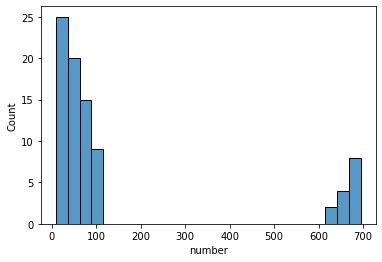

In [64]:
# Checking bus number distribution through a histogram
# Making sure all the bus routes are covered

sns.histplot(x=df_routes['number'])

# 5) Service Advisories

## Contains advisories issued by Winnipeg Transit current and prior for this year

In [65]:
# Calling service advisories data from the api

response = requests.get("https://api.winnipegtransit.com/v3/service-advisories.json?api-key=wPOIZFdePaV6BdttKD7C")
a = response.json()['service-advisories']
df_service_advisories = json_normalize(a)
df_service_advisories

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_4312/35264724.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_service_advisories = json_normalize(a)


,key,priority,title,body,category,updated-at,type
0,5223,3,(OCT 1/22) Graham Closed between Carlton and D...,"As of Oct 01, 2022 15:00, routes BLUE, 16, 17,...",Transit,2022-10-01T12:19:04,service-advisory
1,5218,3,(SEP 26/22) Princess,"As of Sep 26, 2022 02:01, routes 65 and 66 are...",Transit,2022-09-26T06:23:46,service-advisory
2,5217,3,(SEP 22/22) SB Westbrook to WB Pioneer is closed,"As of Sep 22, 2022 14:55, route 53 is under th...",Transit,2022-09-22T14:50:03,service-advisory
3,5213,3,(SEP 19/22) Flight,"As of Sep 19, 2022 09:00, route 15 is under th...",Transit,2022-09-19T09:03:02,service-advisory
4,5206,3,(SEP 15/22) Selkirk reconstruction,"As of Sep 15, 2022 09:35, route 16 is under th...",Transit,2022-09-26T11:48:50,service-advisory
5,5204,3,(SEP 14/22) WB Mountain Closure,"As of Sep 14, 2022 15:10, route 15 is under th...",Transit,2022-09-14T15:04:04,service-advisory
6,5197,3,"(SEP 12/22) 649, 691 Chevrier Detour","As of Sep 12, 2022 11:30, route 649 is under t...",Transit,2022-09-12T12:35:37,service-advisory
7,5137,3,(MAY 29/22) Selkirk reconstruction,"As of Jun 19, 2022 03:00, route 16 is under th...",Transit,2022-08-25T11:27:51,service-advisory
8,5128,3,"(JUL 10/22) 33 route , WB William Closure","As of Jul 10, 2022 10:00, routes 33 and 35 are...",Transit,2022-07-10T10:59:53,service-advisory
9,5127,3,(JUL 6/22) 26 SB Berry,"As of Jul 06, 2022 05:00, route 26 is under th...",Transit,2022-07-05T13:32:04,service-advisory


#### Note: Priority column shows service advisories of this priority or higher (where 1 is high, and 5 is low)

In [66]:
# Checking one sample body text of the first advisory in the data 

df_service_advisories['body'][0]

"As of Oct 01, 2022 15:00, routes BLUE, 16, 17, 18, 20, 30, 31, 32, 33, 35, 42, 44, 45, 46, 48, 49, 58 and 60 are under the effects of a detour. This detour affects the following stops:\n\n* 10616 - Eastbound Graham at Hargrave\n* 10617 - Westbound Graham at Edmonton (RWB)\n* 10618 - Eastbound Graham at Edmonton (RWB)\n* 50503 - Southbound De La Seigneurie at Cassin\n* 50596 - Westbound Island Lakes at Camirant West\n* 50597 - Westbound Island Lakes at Desjardins\n* 50618 - Westbound Island Lakes at Coral Reef\n* 50783 - Southbound De La Seigneurie at Desjardins\n* 50792 - Northbound Desjardins at Myles Robinson\n* 50793 - Northbound Desjardins at Surfside\n* 50795 - Southbound De La Seigneurie at Pynoo\n* 50842 - Westbound Island Lakes at De Caigny\n\nReroutes are as follows:\n\n* **Route 16 (Selkirk-Osborne to Island Lakes via Southdale Centre)** from Graham Avenue will reroute following these instructions:\n** Travel along Graham Avenue and turn south on to Donald Street\n** Continu

# 6) Status

## Shows current status under which transit is operating

In [67]:
# Extracting status data from the api

response = requests.get("https://api.winnipegtransit.com/v3/statuses.json?api-key=wPOIZFdePaV6BdttKD7C")
a = response.json()['statuses']
df_status = json_normalize(a)
df_status

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_4312/2839442592.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_status = json_normalize(a)


,name,value,description,updated-at,message
0,omnibus,normal,The current status of the Omnibus Web Services.,2022-10-01T18:06:49,NaN
1,schedule,regular,NaN,NaN,Winnipeg Transit is currently operating regula...


# 7) Stops

## Bus stops information

In [68]:
# Sample fetch bus stops data from tranist api for single bus variant 16-1-K

response = requests.get("https://api.winnipegtransit.com/v3/stops.json?api-key=wPOIZFdePaV6BdttKD7C&variant=16-1-K")
json_format = response.json()['stops']
df_stops_16_1_K = json_normalize(json_format)
df_stops_16_1_K

C:\Users\AKSHAY~1\AppData\Local\Temp/ipykernel_4312/273273037.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  df_stops_16_1_K = json_normalize(json_format)


,key,name,number,direction,side,street.key,street.name,street.type,cross-street.key,cross-street.name,cross-street.type,cross-street.leg,centre.utm.zone,centre.utm.x,centre.utm.y,centre.geographic.latitude,centre.geographic.longitude,street.leg
0,10001,Southbound Osborne at Mulvey,10001,Southbound,Farside Opposite,2715,Osborne Street,Street,4122,Mulvey Avenue,Avenue,East,14U,633687,5525978,49.87127,-97.13952,NaN
1,10002,Southbound Osborne at Woodward,10002,Southbound,Nearside,2715,Osborne Street,Street,3985,Woodward Avenue,Avenue,NaN,14U,633835,5525710,49.86883,-97.13755,NaN
2,10003,Southbound Osborne at Brandon,10003,Southbound,Nearside,2715,Osborne Street,Street,472,Brandon Avenue,Avenue,NaN,14U,633892,5525607,49.86789,-97.1368,NaN
3,10004,Southbound Osborne at Hethrington,10004,Southbound,Nearside,2715,Osborne Street,Street,1730,Hethrington Avenue,Avenue,NaN,14U,633974,5525458,49.86653,-97.13571,NaN
4,10005,Southbound Osborne at Morley,10005,Southbound,Nearside,2715,Osborne Street,Street,2551,Morley Avenue,Avenue,NaN,14U,634057,5525309,49.86517,-97.1346,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,30743,Eastbound Manitoba at Leo Novak,30743,Eastbound,Nearside,2290,Manitoba Avenue,Avenue,2138,Leo Novak Street,Street,NaN,14U,630192,5532443,49.93016,-97.18595,NaN
66,30764,Westbound Burrows at Haddon,30764,Westbound,Nearside Opposite,576,Burrows Avenue,Avenue,1597,Haddon Road,Road,NaN,14U,627953,5533617,49.9412,-97.21674,NaN
67,30913,Southbound Main at Stella,30913,Southbound,Nearside,2265,Main Street,Street,3479,Stella Avenue,Avenue,NaN,14U,634024,5530293,49.90998,-97.13334,NaN
68,50463,Southbound Kingston Ramp to Dunkirk at Kingsto...,50463,Southbound,Farside,50000005,Kingston Ramp to Dunkirk,NaN,1985,Kingston Row,Row,NaN,14U,634814,5524107,49.8542,-97.12449,NaN


In [69]:
# Initializing an empty dataframe which will contain stops of all bus variants
df_stops = pd.DataFrame()

# Creating a list object containing bus variants whose query search didn't return any result
variants_without_stops = []


# Creating a for loop which will fetch stops data for each bus variant from the api url
# Please note that the loop will run in two parts to avoid overload of winnipeg transit's server
# The server allows for 100 requests per minute only
# Since we have 206 bus variants we will run the loop in two parts 
# for each variant we are creating a request on the api

for bus_variant in bus_variants_list[:100]:
    response = requests.get(f"https://api.winnipegtransit.com/v3/stops.json?api-key=wPOIZFdePaV6BdttKD7C&variant={bus_variant}")
    
    # Creating a check on error server response
    # this condition will print out server error wherever any fetch finds error 
    
    if response.reason == 'OK':
        json_format = response.json()['stops']
    
        # Creating a temporary dataframe df_stops_each_variant which will updated with stops of bus variant on each loop
        # This will be used in concatenating each bus variant's stop info in the main dataframe df_stops
        df_stops_each_variant = pd.json_normalize(json_format)
         
        # Populating bus_variant column with bus variant number value to give the dataframe a unique identifier
        df_stops_each_variant['bus_variant'] = bus_variant
    
        # Concatenating each bus variant's info to main dataframe with bus stops information
        df_stops = pd.concat([df_stops, df_stops_each_variant], ignore_index=True)

    
    else:
        print(f"Bus variant {bus_variant} returned server error while fetching data")
        # Populating a list of bus variants for which destinations couldn't be fetched
        variants_without_stops.append(bus_variant)

In [70]:
# Checking the result of populated dataframe with first 100 bus variants in our list

df_stops

,key,name,number,direction,side,street.key,street.name,street.type,cross-street.key,cross-street.name,cross-street.type,centre.utm.zone,centre.utm.x,centre.utm.y,centre.geographic.latitude,centre.geographic.longitude,bus_variant,cross-street.leg,street.leg
0,50096.0,Eastbound St.Amant Access at St.Amant East,50096.0,Eastbound,Nearside,50000271.0,St.Amant Access,Road,3059.0,River Road,Road,14U,634410.0,5519913.0,49.81659,-97.13157,16-0-s,NaN,NaN
1,50443.0,Eastbound Riel at St. Mary's,50443.0,Eastbound,Nearside,3047.0,Riel Avenue,Avenue,3453.0,St Mary's Road,Road,14U,635587.0,5521034.0,49.8264,-97.11482,16-0-s,NaN,NaN
2,50445.0,Eastbound Riel at Robertson,50445.0,Eastbound,Nearside,3047.0,Riel Avenue,Avenue,3086.0,Robertson Crescent,Crescent,14U,635477.0,5520973.0,49.82588,-97.11637,16-0-s,NaN,NaN
3,50447.0,Eastbound Riel at Darwin,50447.0,Eastbound,Nearside,3047.0,Riel Avenue,Avenue,976.0,Darwin Street,Street,14U,635228.0,5520832.0,49.82467,-97.11988,16-0-s,NaN,NaN
4,50448.0,Eastbound Riel at Metz,50448.0,Eastbound,Farside,3047.0,Riel Avenue,Avenue,2485.0,Metz Street,Street,14U,635047.0,5520729.0,49.82378,-97.12243,16-0-s,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5419,50899.0,Northbound Burning Glass at Sage Creek,50899.0,Northbound,Nearside,4340.0,Burning Glass Road,Road,4339.0,Sage Creek Boulevard,Boulevard,14U,640552.0,5521920.0,49.83322,-97.04551,50-1-D,NaN,NaN
5420,50990.0,Northbound Burning Glass at Dr. David Friesen,50990.0,Northbound,Nearside,4340.0,Burning Glass Road,Road,4441.0,Dr. David Friesen Drive,Drive,14U,640549.0,5522086.0,49.83471,-97.04549,50-1-D,NaN,NaN
5421,50991.0,Eastbound Sage Creek at Solstice Lane,50991.0,Eastbound,Nearside,4339.0,Sage Creek Boulevard,Boulevard,4430.0,Solstice Lane,Lane,14U,641262.0,5521917.0,49.83303,-97.03564,50-1-D,NaN,NaN
5422,50992.0,Eastbound Sage Creek at Charity,50992.0,Eastbound,Nearside,4339.0,Sage Creek Boulevard,Boulevard,4432.0,Charity Lane,Lane,14U,641547.0,5521788.0,49.8318,-97.03173,50-1-D,NaN,NaN


In [71]:
# Running the for loop for the balance bus variants

for bus_variant in bus_variants_list[100:]:
    response = requests.get(f"https://api.winnipegtransit.com/v3/stops.json?api-key=wPOIZFdePaV6BdttKD7C&variant={bus_variant}")
    
    # Creating a check on error server response
    # this condition will print out server error wherever any fetch finds error 
    
    if response.reason == 'OK':
        json_format = response.json()['stops']
    
        # Creating a temporary dataframe df_stops_each_variant which will updated with stops of bus variant on each loop
        # This will be used in concatenating each bus variant's stop info in the main dataframe df_stops
        df_stops_each_variant = pd.json_normalize(json_format)
         
        # Populating bus_variant column with bus variant number value to give the dataframe a unique identifier
        df_stops_each_variant['bus_variant'] = bus_variant
    
        # Concatenating each bus variant's info to main dataframe with bus stops information
        df_stops = pd.concat([df_stops, df_stops_each_variant], ignore_index=True)

    
    else:
        print(f"Bus variant {bus_variant} returned server error while fetching data")
        # Populating a list of bus variants for which destinations couldn't be fetched
        variants_without_stops.append(bus_variant)

In [72]:
# We observe the change in the dataframe. It has now 10505 records which is our final dataframe 
# Containing bus stops information

df_stops

,key,name,number,direction,side,street.key,street.name,street.type,cross-street.key,cross-street.name,cross-street.type,centre.utm.zone,centre.utm.x,centre.utm.y,centre.geographic.latitude,centre.geographic.longitude,bus_variant,cross-street.leg,street.leg
0,50096.0,Eastbound St.Amant Access at St.Amant East,50096.0,Eastbound,Nearside,50000271.0,St.Amant Access,Road,3059.0,River Road,Road,14U,634410.0,5519913.0,49.81659,-97.13157,16-0-s,NaN,NaN
1,50443.0,Eastbound Riel at St. Mary's,50443.0,Eastbound,Nearside,3047.0,Riel Avenue,Avenue,3453.0,St Mary's Road,Road,14U,635587.0,5521034.0,49.8264,-97.11482,16-0-s,NaN,NaN
2,50445.0,Eastbound Riel at Robertson,50445.0,Eastbound,Nearside,3047.0,Riel Avenue,Avenue,3086.0,Robertson Crescent,Crescent,14U,635477.0,5520973.0,49.82588,-97.11637,16-0-s,NaN,NaN
3,50447.0,Eastbound Riel at Darwin,50447.0,Eastbound,Nearside,3047.0,Riel Avenue,Avenue,976.0,Darwin Street,Street,14U,635228.0,5520832.0,49.82467,-97.11988,16-0-s,NaN,NaN
4,50448.0,Eastbound Riel at Metz,50448.0,Eastbound,Farside,3047.0,Riel Avenue,Avenue,2485.0,Metz Street,Street,14U,635047.0,5520729.0,49.82378,-97.12243,16-0-s,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10500,61079.0,Westbound Eldridge at Dieppe,61079.0,Westbound,Farside,1211.0,Eldridge Avenue,Avenue,1053.0,Dieppe Road,Road,14U,623392.0,5523738.0,49.85334,-97.28343,98-0-W,NaN,NaN
10501,61080.0,Westbound Eldridge at Harstone,61080.0,Westbound,Nearside,1211.0,Eldridge Avenue,Avenue,1662.0,Harstone Road,Road,14U,623189.0,5523745.0,49.85345,-97.28625,98-0-W,NaN,NaN
10502,61081.0,Westbound Rannock at Bingham,61081.0,Westbound,Farside Opposite,2988.0,Rannock Avenue,Avenue,367.0,Bingham Drive,Drive,14U,621345.0,5523367.0,49.85043,-97.31201,98-0-W,NaN,NaN
10503,61086.0,Southbound William Clement at Roblin South,61086.0,Southbound,Farside,4509.0,William Clement Parkway,Parkway,3091.0,Roblin Boulevard,Boulevard,14U,624519.0,5524889.0,49.86346,-97.26739,98-0-W,NaN,NaN


In [73]:
# Changing the datatype to int to remove the decimal from stop number
df_stops_number = df_stops['number'].astype(int)
df_stops_number

0        50096
1        50443
2        50445
3        50447
4        50448
         ...  
10500    61079
10501    61080
10502    61081
10503    61086
10504    61133
Name: number, Length: 10505, dtype: int32

In [304]:
# Creating a str data type list of stop number which will be useful in fetching further information
# Changing the dataframe to set datatype first to remove duplicates and then converting to list

stop_numbers_list = list(set(df_stops_number))

In [305]:
number_of_stops = len(stop_numbers_list)
number_of_stops

4122

# Getting Stops Features Through Stops List

## We have to fetch information for every bus stop from the api call

In [306]:
# Since the api calls are 100 requests per minute we have to make calls in chunks of 100
# We will split out bus stops data list of 4122 stops in smaller lists(chunks) of 100s



# For 4122 bus stops we would need 4122/100 number of chunks
chunks_required = round(number_of_stops/100)

# Creating a function which will take stops list and chunks required as input
# The function with create sub-lists of 100 elements in the whole stops list of 4122 stops

def divide_chunks(stop_numbers_list,chunks_required):
    
    # Loops starts with 0 till number of stops and hops on to every another 100th element of the list
    
    for i in range(0, number_of_stops, 100):
        
        # Indexes from 100 till another 100th element
        # For example indexing at first loop i=0 is [0:100]
        # For second loop the i=100 and indexing is [100:200]
        yield stop_numbers_list[i:i + 100]


In [307]:
# Calling the function and giving it object name bus_stop_chunks
# Bus_stop_chunks in coverted list of chunks of list with 100 elements each

bus_stops_chunks = list(divide_chunks(stop_numbers_list, chunks_required))
print(f'Number of bus_stops chunks from original bus stops list: {len(bus_stops_chunks)}')
print(f'Number of elements in each chunk: {len(bus_stops_chunks[0])}')

Number of bus_stops chunks from original bus stops list: 42
Number of elements in each chunk: 100


In [308]:
# Creating a function which will go inside in each bus_stop chunk list elements
# And make an api call for each bus stop

# Initializing with an empty pandas dataframe which will populate with each api call
df_stop_features_per_chunk = pd.DataFrame()


# This function takes in chunk_index(what chunk of the whole list to work on)
# Then for each chunk makes api calls of bus stops in that chunk

def bus_stop_features_chunkwise(chunk_index):
    
    # Declaring the initialized dataframe variable df_stop_features as a global variable
    # Without it the function will consider it to be local variable and not work
    global df_stop_features_per_chunk
    
    # Running a for loop to make api call for each stop in the bus_stops_chunks list
    for stop in bus_stops_chunks[chunk_index]:
        response = requests.get(f"https://api.winnipegtransit.com/v3/stops/{stop}/features.json?api-key=wPOIZFdePaV6BdttKD7C")
        
        # Recording the information got into a temporary frame df_each_stop_features
        json_format = response.json()['stop-features']
        df_each_stop_features = pd.json_normalize(json_format)
        df_each_stop_features['Stop_Number'] = stop
        
        # Simulatenous concatanetion of each stop's info in df_stop_feature_chunk
        # This dataframe will contain records for each chunk of the big 4122 stops list
        df_stop_features_per_chunk = pd.concat([df_stop_features_per_chunk,df_each_stop_features], ignore_index=True)
        
        
        

In [390]:
# Initializng with index 0

chunk_index=0

# Initializing empty dataframe which will contain bus stops features of all bus stops
# This is our final outcome 
df_stop_features =pd.DataFrame()

In [391]:
# Creating a function to repeadtly execute above created function bus_stop_features_chunkwise
# On every run chunk_index increases by 1 
# We will repeadtly make calls of this function in 60 secods intervals

# This function merely runs the previous function and takes in index number of chunk list
def bus_stops_features(index):
    
    # Declaring chunk_index and chunks_required variable as global as its referenced before the function
    global chunk_index
    global chunks_required
    global df_stop_features
    
    # The loop will run until the index_count reaches equal to chunks_required
    # which is number of bus stops in our list divided by 100 elements' chunks)
    if chunk_index <= chunks_required:
        
        # Using a for loop to call run bus_stop_features_chunkwise for each index position
        
        for i in [chunk_index]:
            bus_stop_features_chunkwise(chunk_index=chunk_index)
            
            # For each loop, index value be incremented by 1 which becomes input when function is run again
            chunk_index+=1
            
            # Concatenating with main dataframe
            df_stop_features = pd.concat([df_stop_features, df_stop_features_per_chunk], ignore_index=True)
        
        print(f'Chunk index {i} of Bus Stops List Added to Dataframe at {time.ctime()}')
        
    else:
        print('Every stop feature put into the dataframe. Process complete')

In [350]:
# Importing schedule library for scheduling tasks

import schedule
import time

In [394]:
# Creating a schedule object which will run the bus_stops_features function at every 60 seconds intreval
# We also have defined the index to start with, i.e 0 which will initialized above

schedule.every(60).seconds.do(bus_stops_features, index=chunk_index)

Every 60 seconds do bus_stops_features(index=0) (last run: [never], next run: 2022-10-02 18:42:38)

In [393]:
# Checking pending jobs

schedule.get_jobs()

[]

In [ ]:
# Running a while loop to start running the job

while True:
    schedule.run_pending()

Chunk index 0 of Bus Stops List Added to Dataframe at Sun Oct  2 18:42:50 2022
Chunk index 1 of Bus Stops List Added to Dataframe at Sun Oct  2 18:44:03 2022
Chunk index 2 of Bus Stops List Added to Dataframe at Sun Oct  2 18:45:17 2022
Chunk index 3 of Bus Stops List Added to Dataframe at Sun Oct  2 18:46:29 2022
Chunk index 4 of Bus Stops List Added to Dataframe at Sun Oct  2 18:47:42 2022
Chunk index 5 of Bus Stops List Added to Dataframe at Sun Oct  2 18:48:55 2022
Chunk index 6 of Bus Stops List Added to Dataframe at Sun Oct  2 18:50:07 2022
Chunk index 7 of Bus Stops List Added to Dataframe at Sun Oct  2 18:51:20 2022
Chunk index 8 of Bus Stops List Added to Dataframe at Sun Oct  2 18:52:35 2022
Chunk index 9 of Bus Stops List Added to Dataframe at Sun Oct  2 18:53:47 2022
Chunk index 10 of Bus Stops List Added to Dataframe at Sun Oct  2 18:55:00 2022
Chunk index 11 of Bus Stops List Added to Dataframe at Sun Oct  2 18:56:13 2022
Chunk index 12 of Bus Stops List Added to Datafram

In [395]:
df_stop_features

""


In [ ]:
# Clearing pending schedules after job is done

schedule.clear()